## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# mouse_metadata.head()
# study_results.head()

combined_study_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


grouped_tumors=combined_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_tumor=grouped_tumors.mean()
# print(f"The mean of Tumor Volume is:  {mean_tumor}")

median_tumor=grouped_tumors.median()
# print(f"The median of Tumor Volume is: {median_tumor}")

var_tumor = grouped_tumors.var()
# print(f"The Varience of Tumor Volume is: {var_tumor}")

sd_tumor = grouped_tumors.std()
# print(f"The Standard Diviation of Tumor Volume is: {sd_tumor}")

SEM_tumor=grouped_tumors.sem()

tumor_summary=pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                        "Median Tumor Volume": median_tumor,
                        "Tumor Volume Variance":var_tumor,
                        "Tumor Volume Std. Dev": sd_tumor,
                        "Tumor Volume SEM":SEM_tumor})
tumor_summary=tumor_summary.style.format({"Mean Tumor Volume":"{:.2f}",
                                         "Median Tumor Volume":"{:.2f}",
                                         "Tumor Volume Variance":"{:.2f}",
                                         "Tumor Volume Std. Dev":"{:.2f}",
                                         "Tumor Volume SEM":"{:.3f}"})

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.329
Ceftamin,52.59,51.78,39.29,6.27,0.470
Infubinol,52.88,51.82,43.13,6.57,0.492
Ketapril,55.24,53.70,68.55,8.28,0.604
Naftisol,54.33,52.51,66.17,8.13,0.596
Placebo,54.03,52.29,61.17,7.82,0.581
Propriva,52.32,50.85,42.35,6.51,0.513
Ramicane,40.22,40.67,23.49,4.85,0.321
Stelasyn,54.23,52.43,59.45,7.71,0.573


## Bar plots

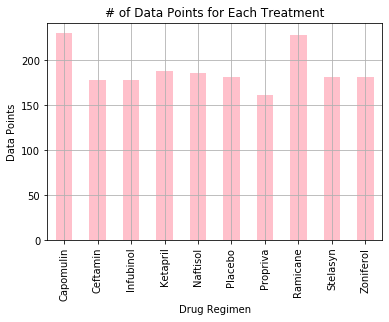

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treat_count=grouped_tumors.count()

count_chart = treat_count.plot(kind='bar', color="pink")

plt.title("# of Data Points for Each Treatment")
plt.ylabel("Data Points")

plt.grid()
plt.show()
plt.tight_layout()

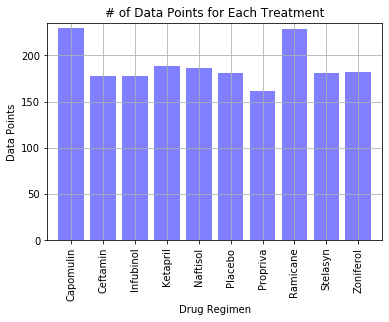

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(treat_count.index,treat_count.values, color="blue",alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(treat_count.index)-.25)
plt.ylim(0, max(treat_count.values) + 5)

plt.title("# of Data Points for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.grid()

## Pie plots

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

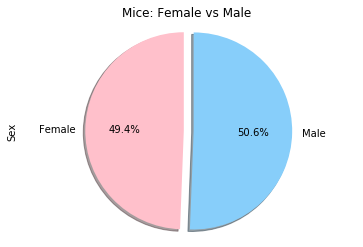

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_grouped=combined_study_df.groupby("Sex")["Mouse ID"].count()

colors = ["pink","lightskyblue"]
explode = (0,.1)

mice_pie = mice_gender_grouped.plot(kind="pie", colors=colors,shadow=True, startangle=90,explode=explode,
                                    autopct="%1.1f%%", title=("Mice: Female vs Male "))
plt.axis("equal")
plt.ylabel("Sex")
mice_gender_grouped

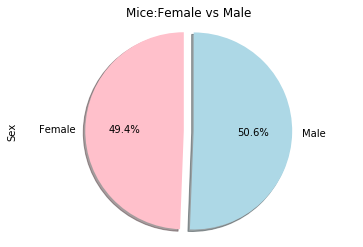

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode=(0,0.1)
colors=("pink","lightblue")
plt.pie(mice_gender_grouped.values, explode=explode, labels=mice_gender_grouped.index, 
        colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Mice:Female vs Male")

plt.ylabel("Sex")
plt.show()
mice_gender_grouped

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

tumor_vol_df=pd.DataFrame(combined_study_df.groupby("Mouse ID")["Timepoint"].max()).reset_index()

merged_vol_df=tumor_vol_df.merge(combined_study_df,on=["Mouse ID", "Timepoint"], how="left")

merged_vol_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [8]:
capomulin = merged_vol_df.loc[merged_vol_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']

cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(f"Lower Quartile of Capomulin is: {round(cap_lowerq,2)}")
print(f"Upper Quartile of Capomulin is: {round(cap_upperq,2)}")
print(f"The interquartile range of Capomullin is: {round(cap_iqr,2)}")
print(f"The the median of Capomullin is: {round(cap_quartiles[0.5],2)} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {round(cap_lower_bound,3)} cound be outliers" )
print(f"Values above {round(cap_upper_bound,3)} could be outliers")

print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Lower Quartile of Capomulin is: 32.38
Upper Quartile of Capomulin is: 40.16
The interquartile range of Capomullin is: 7.78
The the median of Capomullin is: 38.13 
Values below 20.705 cound be outliers
Values above 51.832 could be outliers
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [9]:
ramicane=merged_vol_df.loc[merged_vol_df["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]

ram_quartiles=ramicane.quantile([.25,.5,.75])
ram_lowerq=ram_quartiles[.25]
ram_upperq=ram_quartiles[.75]
ram_iqr=ram_upperq-ram_lowerq
print(f"Lower Quartile of Ramicane is: {round(ram_lowerq,2)}")
print(f"Upper Quartile of Ramicane is: {round(ram_upperq,2)}")
print(f"The interquartile range of Ramicane is: {round(ram_iqr,2)}")
print(f"The the median of Ramicane is: {round(ram_quartiles[0.5],2)} ")

ram_lower_bound=ram_lowerq-(1.5*ram_iqr)
ram_upper_bound=ram_upperq + (1.5*ram_iqr)
print(f"Values below {round(ram_lower_bound,3)} could be outliers")
print(f"Values above {round(ram_upper_bound,3)} could be outliers")

print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Lower Quartile of Ramicane is: 31.56
Upper Quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.913 could be outliers
Values above 54.307 could be outliers
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
infubinol=merged_vol_df.loc[merged_vol_df["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]

inf_quartiles=infubinol.quantile([.25,.5,.75])
inf_lowerq=inf_quartiles[.25]
inf_upperq=inf_quartiles[.75]
inf_iqr=inf_upperq-inf_lowerq
print(f"Lower Quartile of Infubinol is: {round(inf_lowerq,2)}")
print(f"Upper Quartile of Infubinol is: {round(inf_upperq,2)}")
print(f"The interquartile range of Infubinolis: {round(inf_iqr,2)}")
print(f"The the median of Infubinol is: {round(inf_quartiles[0.5],2)} ")

inf_lower_bound=inf_lowerq-(1.5*inf_iqr)
inf_upper_bound=inf_upperq + (1.5*inf_iqr)
print(f"Values below {round(inf_lower_bound,3)} could be outliers")
print(f"Values above {round(inf_upper_bound,3)} could be outliers")

print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol  > inf_upper_bound)]}")

Lower Quartile of Infubinol is: 54.05
Upper Quartile of Infubinol is: 65.53
The interquartile range of Infubinolis: 11.48
The the median of Infubinol is: 60.17 
Values below 36.833 could be outliers
Values above 82.741 could be outliers
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [11]:
ceftamin=merged_vol_df.loc[merged_vol_df["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
 
cef_quartiles=ceftamin.quantile([.25,.5,.75])
cef_lowerq=cef_quartiles[.25]
cef_upperq=cef_quartiles[.75]
cef_iqr=cef_upperq-cef_lowerq
print(f"Lower Quartile of Ceftamin is: {round(cef_lowerq,2)}")
print(f"Upper Quartile of Ceftamin is: {round(cef_upperq,2)}")
print(f"The interquartile range of Ceftamin is: {round(cef_iqr,2)}")
print(f"The the median of Ceftamin is: {round(cef_quartiles[0.5],2)} ")

cef_lower_bound=cef_lowerq-(1.5*cef_iqr)
cef_upper_bound=cef_upperq + (1.5*cef_iqr)
print(f"Values below {round(cef_lower_bound,3)} could be outliers")
print(f"Values above {round(cef_upper_bound,3)} could be outliers")

print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin  > cef_upper_bound)]}")

Lower Quartile of Ceftamin is: 48.72
Upper Quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.355 could be outliers
Values above 87.666 could be outliers
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


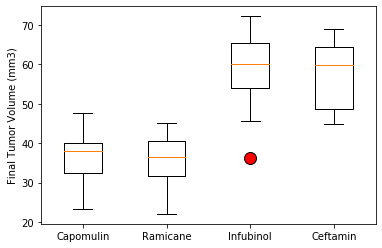

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out=dict(markerfacecolor="red", markersize=12)
plt.boxplot([capomulin, ramicane,infubinol,ceftamin], labels=['Capomulin','Ramicane','Infubinol','Ceftamin']
            ,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and scatter plots

Which mouse ID would you like to chart?s185


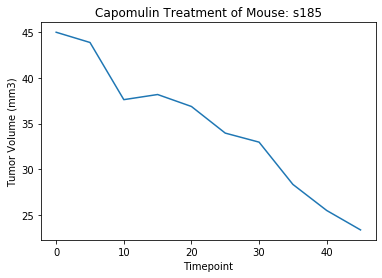

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_mouse=combined_study_df[combined_study_df["Drug Regimen"]== "Capomulin"]

input_id= input("Which mouse ID would you like to chart?")

mouse_id=cap_mouse[cap_mouse["Mouse ID"]== input_id]

mouse_id

plt.plot(mouse_id["Timepoint"],mouse_id["Tumor Volume (mm3)"])

plt.title(f"Capomulin Treatment of Mouse: {input_id}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
# cap_mouse

plt.show()


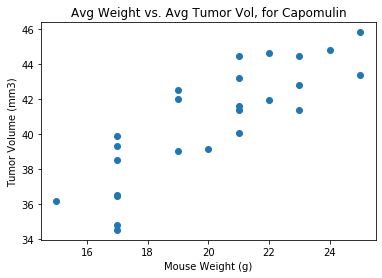

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_cap=cap_mouse.groupby("Mouse ID").mean()

plt.scatter(grouped_cap["Weight (g)"], grouped_cap["Tumor Volume (mm3)"])

plt.title("Avg Weight vs. Avg Tumor Vol, for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

The correlation beteween average mouse weight and average tumor volume is: 0.84


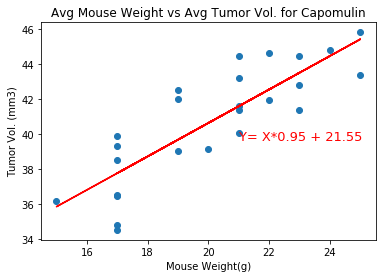

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = grouped_cap["Weight (g)"]
y_values = grouped_cap["Tumor Volume (mm3)"]
# 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#
regress_values= x_values*slope + intercept

plt.scatter(grouped_cap["Weight (g)"], grouped_cap["Tumor Volume (mm3)"])

plt.plot(grouped_cap["Weight (g)"],regress_values,"r-")

line_eq=f"Y= X*{round(slope,2)} + {round(intercept,2)}"

plt.annotate(line_eq,(grouped_cap["Weight (g)"][8],regress_values[10]), fontsize=13, color="red")

plt.title("Avg Mouse Weight vs Avg Tumor Vol. for Capomulin")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Vol. (mm3)")
correlation = st.pearsonr(x_values,y_values)

print(f"The correlation beteween average mouse weight and average tumor volume is: {round(correlation[0],2)}")
# print(regress_values)

